In [19]:
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.utils import np_utils

In [20]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [21]:
seed=0
np.random.seed (seed)
tf.random.set_seed (seed)

In [22]:
(X_train, Y_train), (X_test, Y_test) = reuters.load_data (num_words= 1000, test_split= 0.2 )

In [23]:
category = np.max (Y_train) +1
print (category, '카테고리')
print (len (X_train), '학습용 뉴스 기사')
print (len (X_test), '테스트용 뉴스 기사')
print (X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [24]:
from keras.preprocessing import sequence

X_train = sequence.pad_sequences (X_train, maxlen=100)
X_test = sequence.pad_sequences (X_test, maxlen=100)
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [25]:
model = Sequential()
model.add(Embedding (1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation= 'softmax'))

In [26]:
model.compile (loss= 'categorical_crossentropy',
               optimizer= 'adam',
               metrics = ['accuracy'])

In [27]:
history = model.fit(X_train, Y_train, batch_size=100, epochs=20, validation_data= (X_test, Y_test))
print ("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 25s 3ms/step - loss: 2.5684 - accuracy: 0.3637 - val_loss: 2.1705 - val_accuracy: 0.4586
Epoch 2/20
8982/8982 [==============================] - 24s 3ms/step - loss: 2.0153 - accuracy: 0.4898 - val_loss: 2.0448 - val_accuracy: 0.4768
Epoch 3/20
8982/8982 [==============================] - 24s 3ms/step - loss: 1.8506 - accuracy: 0.5312 - val_loss: 1.9363 - val_accuracy: 0.4822
Epoch 4/20
8982/8982 [==============================] - 24s 3ms/step - loss: 1.8086 - accuracy: 0.5322 - val_loss: 1.8306 - val_accuracy: 0.5316
Epoch 5/20
8982/8982 [==============================] - 24s 3ms/step - loss: 1.6903 - accuracy: 0.5627 - val_loss: 1.7519 - val_accuracy: 0.5659
Epoch 6/20
8982/8982 [==============================] - 24s 3ms/step - loss: 1.6246 - accuracy: 0.5838 - val_loss: 1.6545 - val_accuracy: 0.5793
Epoch 7/20
8982/8982 [==============================] - 24s 3ms/step - loss: 1.539

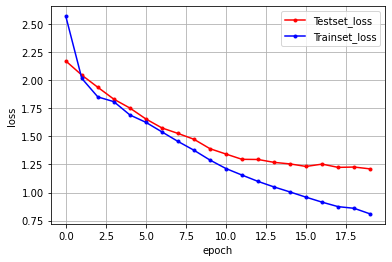

In [29]:
y_vloss = history.history ['val_loss']
y_loss = history.history['loss']

x_len= np.arange(len( y_loss))
plt.plot( x_len, y_vloss, marker='.', c="red", label= 'Testset_loss')
plt.plot( x_len, y_loss, marker= '.', c="blue", label= 'Trainset_loss')

plt.legend (loc= 'upper right')
plt. grid()
plt. xlabel('epoch')
plt. ylabel('loss')
plt. show()